# Optimisez la gestion des données d'une boutique avec R ou Python

## Importation des données

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
erp=pd.read_excel('C:/Users/Lenovo/OneDrive/Desktop/p5/erp.xlsx')
web=pd.read_excel('C:/Users/Lenovo/OneDrive/Desktop/p5/web.xlsx')
liaison=pd.read_excel('C:/Users/Lenovo/OneDrive/Desktop/p5/liaison.xlsx')


C:\Users\lenovo\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\lenovo\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
C:\Users\lenovo\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [2]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [3]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [4]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

### Modification dataframe liaison colonne id_web en sku

In [5]:
liaison=liaison.rename(columns={'id_web':'sku'})

In [6]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [7]:
liaison.head()

product_id    sku
0        3847  15298
1        3849  15296
2        3850  15300
3        4032  19814
4        4039  19815

In [8]:
web.head()

sku  virtual  downloadable  rating_count  average_rating  \
0  bon-cadeau-25-euros        0             0             0             0.0   
1                15298        0             0             0             0.0   
2                15296        0             0             0             0.0   
3                15300        0             0             0             0.0   
4                19814        0             0             0             0.0   

   total_sales tax_status  tax_class  post_author           post_date  ...  \
0         10.0    taxable        NaN          1.0 2018-06-01 13:53:46  ...   
1          6.0    taxable        NaN          2.0 2018-02-08 12:58:52  ...   
2          0.0    taxable        NaN          2.0 2018-02-08 13:49:41  ...   
3          0.0    taxable        NaN          2.0 2018-02-08 14:08:36  ...   
4          3.0    taxable        NaN          2.0 2018-02-09 14:01:05  ...   

                                           post_name       post_modified  \
0                             bon-cadeau-de-25-euros 2018-06-01 14:13:57   
1        pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 09:30:29   
2          pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 09:00:17   
3  pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 18:15:03   
4                  pierre-jean-villa-igp-gamine-2018 2020-01-04 16:36:01   

    post_modified_gmt post_content_filtered post_parent  \
0 2018-06-01 12:13:57                   NaN         0.0   
1 2019-12-30 08:30:29                   NaN         0.0   
2 2019-12-21 08:00:17                   NaN         0.0   
3 2020-06-26 16:15:03                   NaN         0.0   
4 2020-01-04 15:36:01                   NaN         0.0   

                                                guid menu_order  post_type  \
0  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
1  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
2  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
3  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
4  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   

  post_mime_type comment_count  
0            NaN           0.0  
1            NaN           0.0  
2            NaN           0.0  
3            NaN           0.0  
4            NaN           0.0  

[5 rows x 28 columns]

In [9]:
erp.head()

product_id  onsale_web  price  stock_quantity stock_status
0        3847           1   24.2               0   outofstock
1        3849           1   34.3               0   outofstock
2        3850           1   20.8               0   outofstock
3        4032           1   14.1               0   outofstock
4        4039           1   46.0               0   outofstock

### Nettoyage dataframe liaison 

In [10]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [63]:
## traitement valeurs NaN

In [11]:
mask=liaison['sku'].isna()
liaison[mask]

product_id  sku
19         4055  NaN
49         4090  NaN
50         4092  NaN
119        4195  NaN
131        4209  NaN
..          ...  ...
817        7196  NaN
818        7200  NaN
819        7201  NaN
820        7203  NaN
821        7204  NaN

[91 rows x 2 columns]

In [12]:
liaison.drop(liaison[liaison['sku'].isna()].index,inplace=True)
liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  734 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


In [13]:
liaison['sku'] = liaison['sku'].astype(str)


In [14]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  734 non-null    int64 
 1   sku         734 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


### Nettoyage dataframe web

In [15]:
web.head()

sku  virtual  downloadable  rating_count  average_rating  \
0  bon-cadeau-25-euros        0             0             0             0.0   
1                15298        0             0             0             0.0   
2                15296        0             0             0             0.0   
3                15300        0             0             0             0.0   
4                19814        0             0             0             0.0   

   total_sales tax_status  tax_class  post_author           post_date  ...  \
0         10.0    taxable        NaN          1.0 2018-06-01 13:53:46  ...   
1          6.0    taxable        NaN          2.0 2018-02-08 12:58:52  ...   
2          0.0    taxable        NaN          2.0 2018-02-08 13:49:41  ...   
3          0.0    taxable        NaN          2.0 2018-02-08 14:08:36  ...   
4          3.0    taxable        NaN          2.0 2018-02-09 14:01:05  ...   

                                           post_name       post_modified  \
0                             bon-cadeau-de-25-euros 2018-06-01 14:13:57   
1        pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 09:30:29   
2          pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 09:00:17   
3  pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 18:15:03   
4                  pierre-jean-villa-igp-gamine-2018 2020-01-04 16:36:01   

    post_modified_gmt post_content_filtered post_parent  \
0 2018-06-01 12:13:57                   NaN         0.0   
1 2019-12-30 08:30:29                   NaN         0.0   
2 2019-12-21 08:00:17                   NaN         0.0   
3 2020-06-26 16:15:03                   NaN         0.0   
4 2020-01-04 15:36:01                   NaN         0.0   

                                                guid menu_order  post_type  \
0  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
1  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
2  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
3  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
4  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   

  post_mime_type comment_count  
0            NaN           0.0  
1            NaN           0.0  
2            NaN           0.0  
3            NaN           0.0  
4            NaN           0.0  

[5 rows x 28 columns]

In [16]:
## traitement bon-cadeau-25-euros

In [17]:
web[web['sku']=='bon-cadeau-25-euros']

sku  virtual  downloadable  rating_count  \
0     bon-cadeau-25-euros        0             0             0   
1209  bon-cadeau-25-euros        0             0             0   

      average_rating  total_sales tax_status  tax_class  post_author  \
0                0.0         10.0    taxable        NaN          1.0   
1209             0.0         10.0        NaN        NaN          1.0   

               post_date  ...               post_name       post_modified  \
0    2018-06-01 13:53:46  ...  bon-cadeau-de-25-euros 2018-06-01 14:13:57   
1209 2018-06-01 13:53:46  ...  bon-cadeau-de-25-euros 2018-06-01 14:13:57   

       post_modified_gmt post_content_filtered post_parent  \
0    2018-06-01 12:13:57                   NaN         0.0   
1209 2018-06-01 12:13:57                   NaN         0.0   

                                                   guid menu_order  \
0     https://www.bottle-neck.fr/?post_type=product&...        0.0   
1209  https://www.bottle-neck.fr/wp-content/uploads/...        0.0   

       post_type post_mime_type comment_count  
0        product            NaN           0.0  
1209  attachment     image/jpeg           0.0  

[2 rows x 28 columns]

In [18]:
web.drop(web[web['sku']=='bon-cadeau-25-euros'].index,inplace=True)
web.head()

sku  virtual  downloadable  rating_count  average_rating  total_sales  \
1  15298        0             0             0             0.0          6.0   
2  15296        0             0             0             0.0          0.0   
3  15300        0             0             0             0.0          0.0   
4  19814        0             0             0             0.0          3.0   
5  19815        0             0             0             0.0          0.0   

  tax_status  tax_class  post_author           post_date  ...  \
1    taxable        NaN          2.0 2018-02-08 12:58:52  ...   
2    taxable        NaN          2.0 2018-02-08 13:49:41  ...   
3    taxable        NaN          2.0 2018-02-08 14:08:36  ...   
4    taxable        NaN          2.0 2018-02-09 14:01:05  ...   
5    taxable        NaN          2.0 2018-02-12 09:04:37  ...   

                                           post_name       post_modified  \
1        pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 09:30:29   
2          pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 09:00:17   
3  pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 18:15:03   
4                  pierre-jean-villa-igp-gamine-2018 2020-01-04 16:36:01   
5          pierre-jean-villa-cote-rotie-carmina-2017 2020-01-04 16:36:10   

    post_modified_gmt post_content_filtered post_parent  \
1 2019-12-30 08:30:29                   NaN         0.0   
2 2019-12-21 08:00:17                   NaN         0.0   
3 2020-06-26 16:15:03                   NaN         0.0   
4 2020-01-04 15:36:01                   NaN         0.0   
5 2020-01-04 15:36:10                   NaN         0.0   

                                                guid menu_order  post_type  \
1  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
2  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
3  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
4  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
5  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   

  post_mime_type comment_count  
1            NaN           0.0  
2            NaN           0.0  
3            NaN           0.0  
4            NaN           0.0  
5            NaN           0.0  

[5 rows x 28 columns]

In [19]:
## traitement doublons

In [20]:
web.duplicated(subset =["sku"]).sum()


797

In [21]:
web['sku'] = web['sku'].astype(str)
web.sort_values('sku')

sku  virtual  downloadable  rating_count  average_rating  total_sales  \
628   10014        0             0             0             0.0          0.0   
1399  10014        0             0             0             0.0          0.0   
1046  10459        0             0             0             0.0          0.0   
255   10459        0             0             0             0.0          0.0   
321   10775        0             0             0             0.0          0.0   
...     ...      ...           ...           ...             ...          ...   
701     nan        0             0             0             NaN          NaN   
671     nan        0             0             0             NaN          NaN   
639     nan        0             0             0             NaN          NaN   
739     nan        0             0             0             NaN          NaN   
756     nan        0             0             0             NaN          NaN   

     tax_status  tax_class  post_author           post_date  ...  \
628     taxable        NaN          2.0 2019-04-04 15:45:23  ...   
1399        NaN        NaN          2.0 2019-04-04 15:45:23  ...   
1046        NaN        NaN          2.0 2018-04-13 15:58:19  ...   
255     taxable        NaN          2.0 2018-04-13 15:58:19  ...   
321     taxable        NaN          2.0 2018-04-17 21:28:52  ...   
...         ...        ...          ...                 ...  ...   
701         NaN        NaN          NaN                 NaT  ...   
671         NaN        NaN          NaN                 NaT  ...   
639         NaN        NaN          NaN                 NaT  ...   
739         NaN        NaN          NaN                 NaT  ...   
756         NaN        NaN          NaN                 NaT  ...   

                                              post_name       post_modified  \
628                    darnleys-london-dry-gin-original 2020-08-26 15:55:02   
1399                   darnleys-london-dry-gin-original 2020-08-26 15:55:02   
1046  alphonse-mellot-sancerre-rouge-generation-xix-... 2020-08-24 14:05:02   
255   alphonse-mellot-sancerre-rouge-generation-xix-... 2020-08-24 14:05:02   
321   albert-mann-pinot-gris-vendanges-tardives-alte... 2018-12-22 10:30:02   
...                                                 ...                 ...   
701                                                 NaN                 NaT   
671                                                 NaN                 NaT   
639                                                 NaN                 NaT   
739                                                 NaN                 NaT   
756                                                 NaN                 NaT   

       post_modified_gmt post_content_filtered post_parent  \
628  2020-08-26 13:55:02                   NaN         0.0   
1399 2020-08-26 13:55:02                   NaN         0.0   
1046 2020-08-24 12:05:02                   NaN         0.0   
255  2020-08-24 12:05:02                   NaN         0.0   
321  2018-12-22 09:30:02                   NaN         0.0   
...                  ...                   ...         ...   
701                  NaT                   NaN         NaN   
671                  NaT                   NaN         NaN   
639                  NaT                   NaN         NaN   
739                  NaT                   NaN         NaN   
756                  NaT                   NaN         NaN   

                                                   guid menu_order  \
628   https://www.bottle-neck.fr/?post_type=product&...        0.0   
1399  https://www.bottle-neck.fr/wp-content/uploads/...        0.0   
1046  https://www.bottle-neck.fr/wp-content/uploads/...        0.0   
255   https://www.bottle-neck.fr/?post_type=product&...        0.0   
321   https://www.bottle-neck.fr/?post_type=product&...        0.0   
...                                                 ...        ...   
701                               

In [22]:
## on garde product (attachement est supprimée car cela represente l'image du produit)
web.drop(web[web['post_type']=='attachment'].index,inplace=True)
web.head()

sku  virtual  downloadable  rating_count  average_rating  total_sales  \
1  15298        0             0             0             0.0          6.0   
2  15296        0             0             0             0.0          0.0   
3  15300        0             0             0             0.0          0.0   
4  19814        0             0             0             0.0          3.0   
5  19815        0             0             0             0.0          0.0   

  tax_status  tax_class  post_author           post_date  ...  \
1    taxable        NaN          2.0 2018-02-08 12:58:52  ...   
2    taxable        NaN          2.0 2018-02-08 13:49:41  ...   
3    taxable        NaN          2.0 2018-02-08 14:08:36  ...   
4    taxable        NaN          2.0 2018-02-09 14:01:05  ...   
5    taxable        NaN          2.0 2018-02-12 09:04:37  ...   

                                           post_name       post_modified  \
1        pierre-jean-villa-saint-joseph-preface-2018 2019-12-30 09:30:29   
2          pierre-jean-villa-saint-joseph-tilde-2017 2019-12-21 09:00:17   
3  pierre-jean-villa-croze-hermitage-accroche-coe... 2020-06-26 18:15:03   
4                  pierre-jean-villa-igp-gamine-2018 2020-01-04 16:36:01   
5          pierre-jean-villa-cote-rotie-carmina-2017 2020-01-04 16:36:10   

    post_modified_gmt post_content_filtered post_parent  \
1 2019-12-30 08:30:29                   NaN         0.0   
2 2019-12-21 08:00:17                   NaN         0.0   
3 2020-06-26 16:15:03                   NaN         0.0   
4 2020-01-04 15:36:01                   NaN         0.0   
5 2020-01-04 15:36:10                   NaN         0.0   

                                                guid menu_order  post_type  \
1  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
2  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
3  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
4  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   
5  https://www.bottle-neck.fr/?post_type=product&...        0.0    product   

  post_mime_type comment_count  
1            NaN           0.0  
2            NaN           0.0  
3            NaN           0.0  
4            NaN           0.0  
5            NaN           0.0  

[5 rows x 28 columns]

In [23]:
web.duplicated(subset =["sku"]).sum()


84

In [24]:
web[web.duplicated(subset=["sku"])]

sku  virtual  downloadable  rating_count  average_rating  total_sales  \
179  nan        0             0             0             NaN          NaN   
227  nan        0             0             0             NaN          NaN   
230  nan        0             0             0             NaN          NaN   
231  nan        0             0             0             NaN          NaN   
233  nan        0             0             0             NaN          NaN   
..   ...      ...           ...           ...             ...          ...   
792  nan        0             0             0             NaN          NaN   
793  nan        0             0             0             NaN          NaN   
794  nan        0             0             0             NaN          NaN   
795  nan        0             0             0             NaN          NaN   
796  nan        0             0             0             NaN          NaN   

    tax_status  tax_class  post_author post_date  ... post_name  \
179        NaN        NaN          NaN       NaT  ...       NaN   
227        NaN        NaN          NaN       NaT  ...       NaN   
230        NaN        NaN          NaN       NaT  ...       NaN   
231        NaN        NaN          NaN       NaT  ...       NaN   
233        NaN        NaN          NaN       NaT  ...       NaN   
..         ...        ...          ...       ...  ...       ...   
792        NaN        NaN          NaN       NaT  ...       NaN   
793        NaN        NaN          NaN       NaT  ...       NaN   
794        NaN        NaN          NaN       NaT  ...       NaN   
795        NaN        NaN          NaN       NaT  ...       NaN   
796        NaN        NaN          NaN       NaT  ...       NaN   

     post_modified post_modified_gmt post_content_filtered post_parent guid  \
179            NaT               NaT                   NaN         NaN  NaN   
227            NaT               NaT                   NaN         NaN  NaN   
230            NaT               NaT                   NaN         NaN  NaN   
231            NaT               NaT                   NaN         NaN  NaN   
233            NaT               NaT                   NaN         NaN  NaN   
..             ...               ...                   ...         ...  ...   
792            NaT               NaT                   NaN         NaN  NaN   
793            NaT               NaT                   NaN         NaN  NaN   
794            NaT               NaT                   NaN         NaN  NaN   
795            NaT               NaT                   NaN         NaN  NaN   
796            NaT               NaT                   NaN         NaN  NaN   

    menu_order  post_type post_mime_type comment_count  
179        NaN        NaN            NaN           NaN  
227        NaN        NaN            NaN           NaN  
230        NaN        NaN            NaN           NaN  
231        NaN        NaN            NaN           NaN  
233        NaN        NaN            NaN           NaN  
..         ...        ...            ...           ...  
792        NaN        NaN            NaN           NaN  
793        NaN        NaN            NaN           NaN  
794        NaN        NaN            NaN           NaN  
795        NaN        NaN            NaN           NaN  
796        NaN        NaN            NaN           NaN  

[84 rows x 28 columns]

In [25]:
web.drop(web[web['sku']=='nan'].index,inplace=True)
web[web.duplicated(subset=["sku"])]

Empty DataFrame
Columns: [sku, virtual, downloadable, rating_count, average_rating, total_sales, tax_status, tax_class, post_author, post_date, post_date_gmt, post_content, post_title, post_excerpt, post_status, comment_status, ping_status, post_password, post_name, post_modified, post_modified_gmt, post_content_filtered, post_parent, guid, menu_order, post_type, post_mime_type, comment_count]
Index: []

[0 rows x 28 columns]

In [26]:
web.duplicated(subset=['sku']).sum()

0

In [27]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 1 to 798
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    713 non-null    object        
 1   virtual                713 non-null    int64         
 2   downloadable           713 non-null    int64         
 3   rating_count           713 non-null    int64         
 4   average_rating         713 non-null    float64       
 5   total_sales            713 non-null    float64       
 6   tax_status             713 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            713 non-null    float64       
 9   post_date              713 non-null    datetime64[ns]
 10  post_date_gmt          713 non-null    datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             713 non-null    object        
 13  post_

In [64]:
## on garde les colonnes qui nous interessent

In [28]:
web.columns

Index(['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating',
       'total_sales', 'tax_status', 'tax_class', 'post_author', 'post_date',
       'post_date_gmt', 'post_content', 'post_title', 'post_excerpt',
       'post_status', 'comment_status', 'ping_status', 'post_password',
       'post_name', 'post_modified', 'post_modified_gmt',
       'post_content_filtered', 'post_parent', 'guid', 'menu_order',
       'post_type', 'post_mime_type', 'comment_count'],
      dtype='object')

In [29]:
web1=web.drop(columns={'virtual','average_rating','downloadable','rating_count','tax_status','tax_class','post_author','post_date','post_date_gmt','post_content','post_title','post_excerpt','post_status','comment_status','ping_status','post_password','post_name','post_modified','post_modified_gmt','post_content_filtered','post_parent','guid','menu_order','post_type','post_mime_type','comment_count'})

In [30]:
web1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 1 to 798
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sku          713 non-null    object 
 1   total_sales  713 non-null    float64
dtypes: float64(1), object(1)
memory usage: 16.7+ KB


## Jointures

In [31]:
jointure=pd.merge(erp,liaison,how='left', on='product_id')
jointure.head()

product_id  onsale_web  price  stock_quantity stock_status    sku
0        3847           1   24.2               0   outofstock  15298
1        3849           1   34.3               0   outofstock  15296
2        3850           1   20.8               0   outofstock  15300
3        4032           1   14.1               0   outofstock  19814
4        4039           1   46.0               0   outofstock  19815

In [32]:
jointure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   sku             734 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 45.1+ KB


In [33]:
## traitement valeur manquantes

In [34]:
jointure.dropna(inplace=True)
jointure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 824
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      734 non-null    int64  
 1   onsale_web      734 non-null    int64  
 2   price           734 non-null    float64
 3   stock_quantity  734 non-null    int64  
 4   stock_status    734 non-null    object 
 5   sku             734 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 40.1+ KB


In [65]:
# deuxieme jointure

In [35]:
jointure2=pd.merge(jointure,web1,how='left', on='sku')

In [36]:
jointure2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      734 non-null    int64  
 1   onsale_web      734 non-null    int64  
 2   price           734 non-null    float64
 3   stock_quantity  734 non-null    int64  
 4   stock_status    734 non-null    object 
 5   sku             734 non-null    object 
 6   total_sales     713 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 45.9+ KB


In [37]:
## traitement valeurs manquantes

In [38]:
jointure2.dropna(inplace=True)
jointure2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 733
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      713 non-null    int64  
 1   onsale_web      713 non-null    int64  
 2   price           713 non-null    float64
 3   stock_quantity  713 non-null    int64  
 4   stock_status    713 non-null    object 
 5   sku             713 non-null    object 
 6   total_sales     713 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 44.6+ KB


In [66]:
## suppression des colonnes qui ne nous interessent pas pour la suite des questions

In [40]:
jointure_simp=jointure2.drop(columns={'onsale_web','stock_quantity','stock_status'})

In [41]:
jointure_simp['CA']=jointure_simp['price']*jointure_simp['total_sales']
jointure_simp.head()

product_id  price    sku  total_sales     CA
0        3847   24.2  15298          6.0  145.2
1        3849   34.3  15296          0.0    0.0
2        3850   20.8  15300          0.0    0.0
3        4032   14.1  19814          3.0   42.3
4        4039   46.0  19815          0.0    0.0

In [42]:
jointure_simp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 733
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   713 non-null    int64  
 1   price        713 non-null    float64
 2   sku          713 non-null    object 
 3   total_sales  713 non-null    float64
 4   CA           713 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 33.4+ KB


## Le CA par produits

In [43]:
jointure_simp.head()

product_id  price    sku  total_sales     CA
0        3847   24.2  15298          6.0  145.2
1        3849   34.3  15296          0.0    0.0
2        3850   20.8  15300          0.0    0.0
3        4032   14.1  19814          3.0   42.3
4        4039   46.0  19815          0.0    0.0

## Le CA total

In [67]:
ca=jointure_simp['CA'].sum()
print("Le chiffre d'affaire total est de {:,.2f} euros".format(ca))

Le chiffre d'affaire total est de 70,318.60 euros


## Recherche valeurs aberrantes

In [45]:
# maniere graphique 2 exemples

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

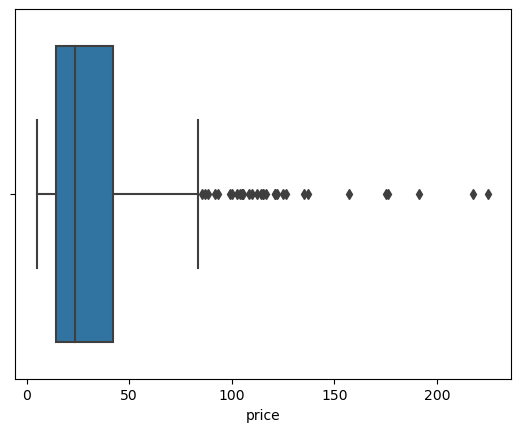

In [46]:
import seaborn as sns
sns.boxplot(jointure_simp['price'])

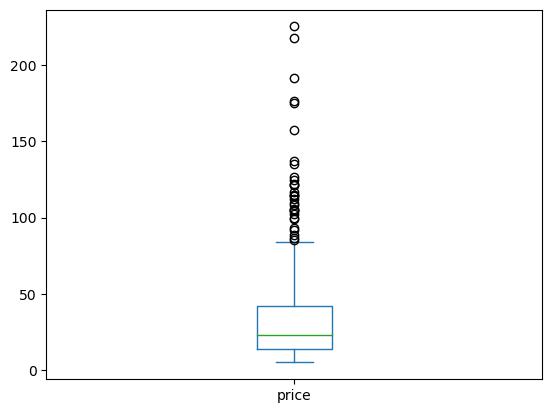

In [47]:
ax = jointure_simp.price.plot(kind='box')

In [48]:
# maniere analytique

### calcul de la moyenne, mediane, ecart-type, IQR

In [49]:
mean=np.mean(jointure_simp.price)
mean

32.50364656381488

In [50]:
mean_max=mean*1.1
mean_max

35.754011220196375

In [51]:
mean_min=mean*0.9
mean_min

29.253281907433394

In [52]:
median=np.median(jointure_simp.price)
median

23.5

In [53]:
from scipy import stats
trim_mean=stats.trim_mean(jointure_simp.price, 0.05)
trim_mean

29.08398133748056

In [54]:
iqr=stats.iqr(jointure_simp.price)
iqr

28.1

## Méthode Z score = (Observation - Mean)/standard deviation

In [62]:
mean=np.mean(jointure_simp['price'])
stddev=np.std(jointure_simp.price)
outlier_max_zscore=mean+3*stddev
outlier_max_zscore

115.93096789705248

In [56]:
jointure_simp[jointure_simp.price>outlier_max_zscore]

product_id  price    sku  total_sales      CA
200        4352  225.0  15940          5.0  1125.0
202        4355  126.5  12589         11.0  1391.5
219        4402  176.0   3510         13.0  2288.0
222        4406  157.0   7819          0.0     0.0
387        4904  137.0  14220          5.0   685.0
434        5001  217.5  14581          0.0     0.0
524        5612  124.8  14915          0.0     0.0
566        5767  175.0  15185          0.0     0.0
601        5892  191.3  14983          3.0   573.9
617        5917  122.0  14775          0.0     0.0
661        6126  135.0  14923          2.0   270.0
667        6202  116.4  15126          0.0     0.0
673        6213  121.0  15072          0.0     0.0
676        6216  121.0  15070          0.0     0.0

## Méthode IQR (1,5 fois la distance interquartile avant le premier et après le troisième)

In [57]:
iqr=stats.iqr(jointure_simp.price)
outliers_max_iqr=jointure_simp.price.quantile(.75)+1.5*iqr
outliers_max_iqr

84.35000000000001

In [58]:
jointure_simp[jointure_simp.price>outliers_max_iqr]

product_id  price    sku  total_sales      CA
63         4115  100.0  15382          0.0     0.0
65         4132   88.4  11668          0.0     0.0
200        4352  225.0  15940          5.0  1125.0
202        4355  126.5  12589         11.0  1391.5
206        4359   85.6  13853          1.0    85.6
219        4402  176.0   3510         13.0  2288.0
220        4404  108.5   3507          2.0   217.0
222        4406  157.0   7819          0.0     0.0
223        4407  104.0   3509          1.0   104.0
229        4582  109.6  12857          0.0     0.0
386        4903  102.3  14805          0.0     0.0
387        4904  137.0  14220          5.0   685.0
434        5001  217.5  14581          0.0     0.0
439        5007  105.0  12791          0.0     0.0
440        5008  105.0  11602          0.0     0.0
447        5025  112.0  13914          0.0     0.0
448        5026   86.8  13913          0.0     0.0
514        5565   92.0  19822          0.0     0.0
524        5612  124.8  14915          0.0     0.0
566        5767  175.0  15185          0.0     0.0
601        5892  191.3  14983          3.0   573.9
616        5916   93.0  14774          0.0     0.0
617        5917  122.0  14775          0.0     0.0
618        5918  114.0  14773          0.0     0.0
661        6126  135.0  14923          2.0   270.0
666        6201  105.6  14596          0.0     0.0
667        6202  116.4  15126          0.0     0.0
672        6212  115.0  13996          2.0   230.0
673        6213  121.0  15072          0.0     0.0
674        6214   99.0  11601          0.0     0.0
675        6215  115.0  12790          0.0     0.0
676        6216  121.0  15070          0.0     0.0